# Ковариация и корреляция

In [28]:
import pandas as pd 
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Задаем даты анализируемого периода
start = dt.datetime(2022, 2, 24) # (2022, 2, 24)
end = dt.datetime(2023, 1, 9) # (2022, 2, 24)

In [72]:
# Составляем пакет акций
stocks = {"Google":"GOOG",
          "Pfizer":"PFE",
          "Boeing":"BA",
          "Ford":"F",
          "Volkswagen":"VWAGY",
          "Micron":"MU",
          "TSMC":"TSM",
          "Texas Instruments":"TXN",
          "Qualcomm":"QCOM",
          "NVidia":"NVDA"
         }

In [73]:
# Делаем упорядоченный по отраслям список тикеров акций 
tickers = list(stocks.values())

In [74]:
# формируем исторические данные по нашему портфелю
portfolio =  pdr.get_data_yahoo(tickers,
                                    start, 
                                    end)['Adj Close'] # Выбираем только значения по закрытию торгов
portfolio = portfolio.astype('float')
portfolio.head() 

[*********************100%***********************]  10 of 10 completed


,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2022-02-24,198.429993,16.693913,132.673492,88.148438,237.258148,44.852787,164.429245,109.515984,166.018738,22.201883
2022-02-25,201.479996,17.355829,134.519501,89.408676,241.344330,46.570393,167.316879,108.879723,167.222870,23.329777
2022-02-28,205.339996,17.093008,134.891006,88.178192,243.622192,45.809177,168.354492,104.748886,166.410339,22.120401
2022-03-01,194.910004,16.255880,134.167999,85.598152,234.550674,44.647846,160.229919,105.766922,163.767181,20.670868
2022-03-02,197.809998,17.618649,134.751495,92.584129,242.014954,46.550873,166.363510,107.293953,166.518005,20.863855


In [75]:
portfolio.shape

(219, 10)

In [76]:
portfolio.dtypes

BA       float64
F        float64
GOOG     float64
MU       float64
NVDA     float64
PFE      float64
QCOM     float64
TSM      float64
TXN      float64
VWAGY    float64
dtype: object

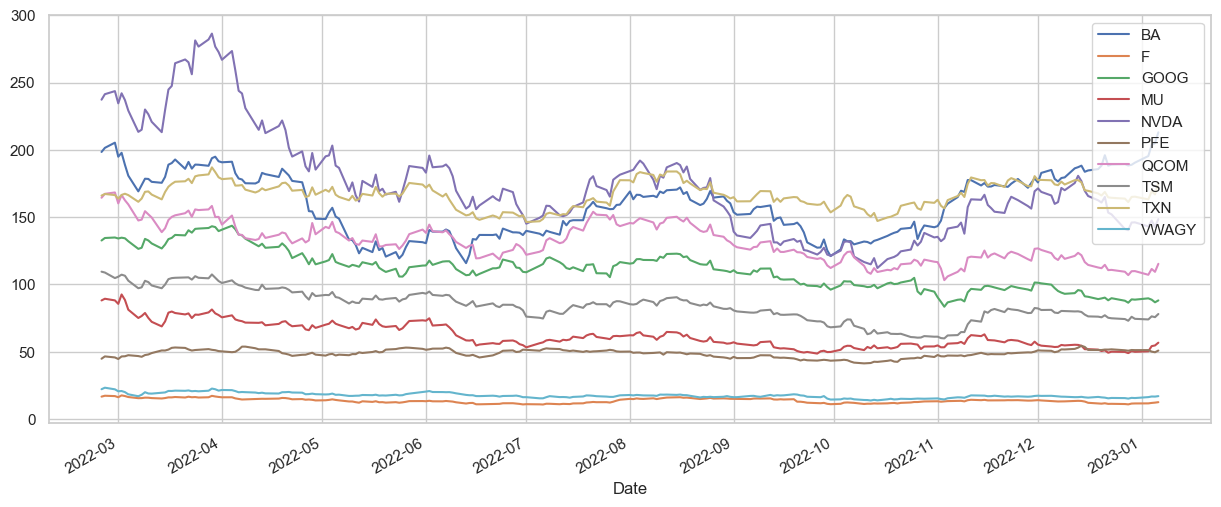

In [77]:
portfolio.plot(figsize=(15,6))
plt.show()

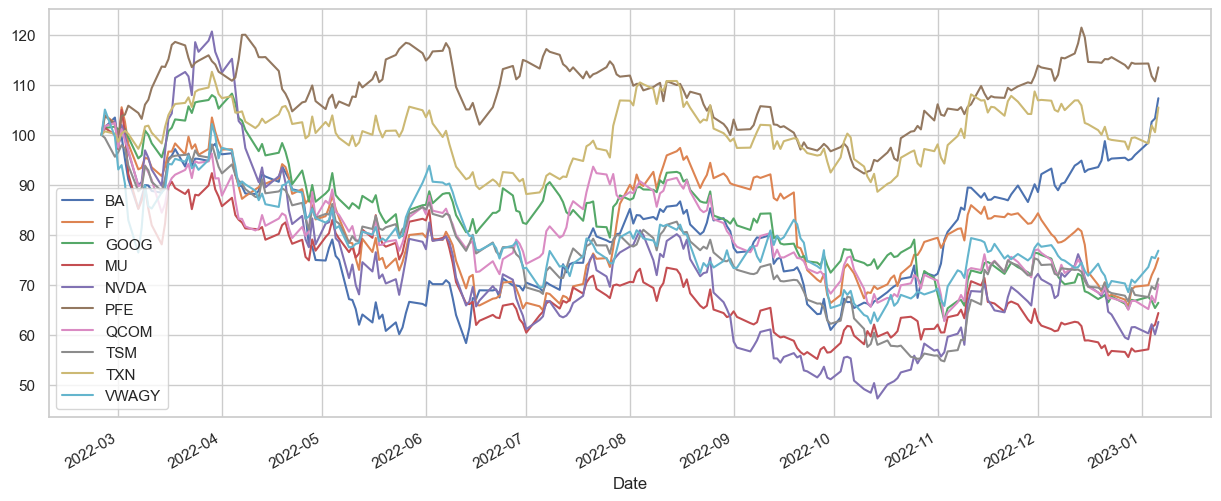

In [78]:
(portfolio / portfolio.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

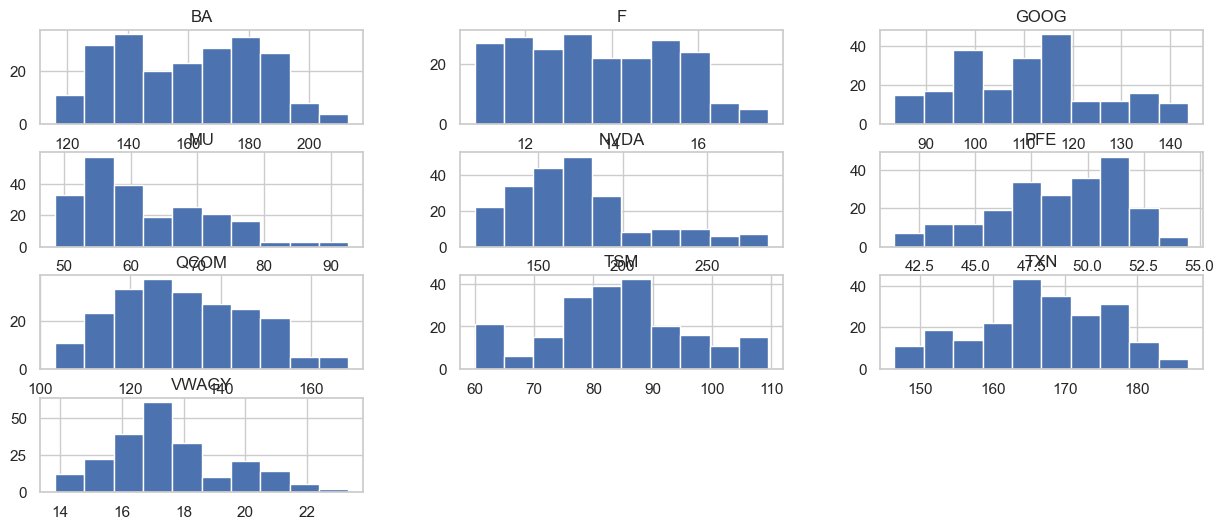

In [79]:
portfolio.hist(figsize=(15,6))
plt.show()

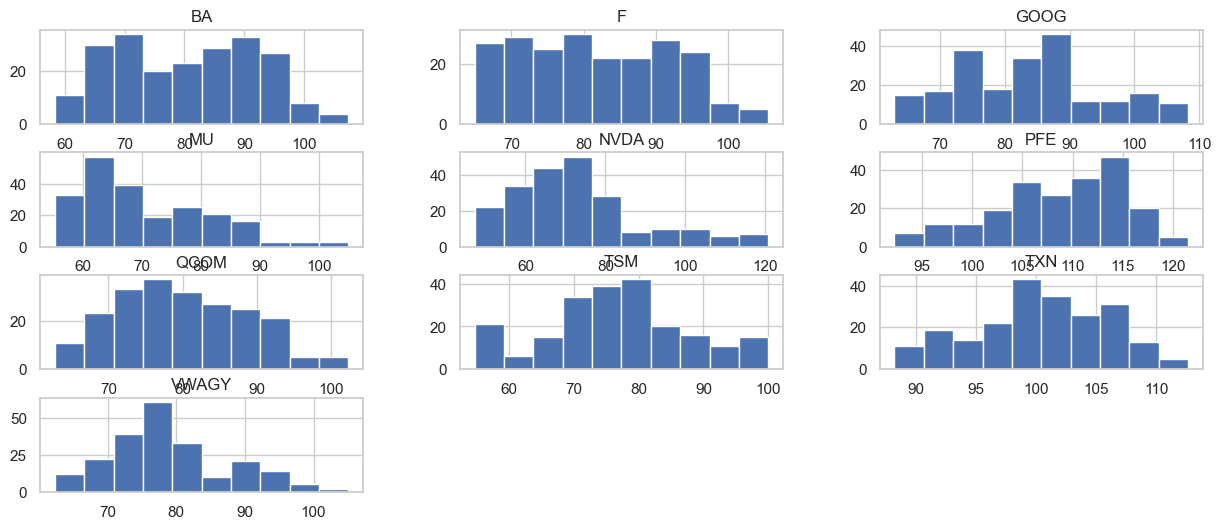

In [80]:
(portfolio / portfolio.iloc[0] * 100).hist(figsize = (15, 6));

In [81]:
#  создаем таблицу относительныхдоходностей
returns = (portfolio / portfolio.shift(1)) - 1  # 0+/-
#  смотрим, что по "краям"
returns.iloc[[0,1,-2,-1]]

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2022-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-25,0.015371,0.039650,0.013914,0.014297,0.017223,0.038294,0.017562,-0.005810,0.007253,0.050802
2023-01-05,0.006629,0.019983,-0.021869,0.009410,-0.032816,-0.009376,-0.019098,-0.007731,-0.013241,-0.003514
2023-01-06,0.039075,0.026939,0.016019,0.037653,0.041640,0.025372,0.054296,0.030899,0.049302,0.019963


In [82]:
# Удаляем незаполненную (первую) строку
returns.dropna(inplace = True) 
returns

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
Date,,,,,,,,,,
2022-02-25,0.015371,0.039650,0.013914,0.014297,0.017223,0.038294,0.017562,-0.005810,0.007253,0.050802
2022-02-28,0.019158,-0.015143,0.002762,-0.013762,0.009438,-0.016345,0.006201,-0.037939,-0.004859,-0.051838
2022-03-01,-0.050794,-0.048975,-0.005360,-0.029259,-0.037236,-0.025351,-0.048259,0.009719,-0.015883,-0.065529
2022-03-02,0.014879,0.083832,0.004349,0.081614,0.031824,0.042623,0.038280,0.014438,0.016797,0.009336
2022-03-03,-0.045296,-0.027624,-0.003291,-0.044159,-0.020892,0.002725,-0.023043,-0.007481,0.005291,-0.039260
...,...,...,...,...,...,...,...,...,...,...
2022-12-30,0.008364,0.007799,-0.002473,-0.010983,0.000753,-0.001753,0.000910,-0.019868,0.001212,-0.008555
2023-01-03,0.025723,0.004299,0.010932,0.007803,-0.020460,0.000390,-0.024923,-0.006175,-0.012166,0.044423
2023-01-04,0.042223,0.028253,-0.011037,0.076037,0.030318,-0.022044,0.040392,0.030933,0.036517,0.027540


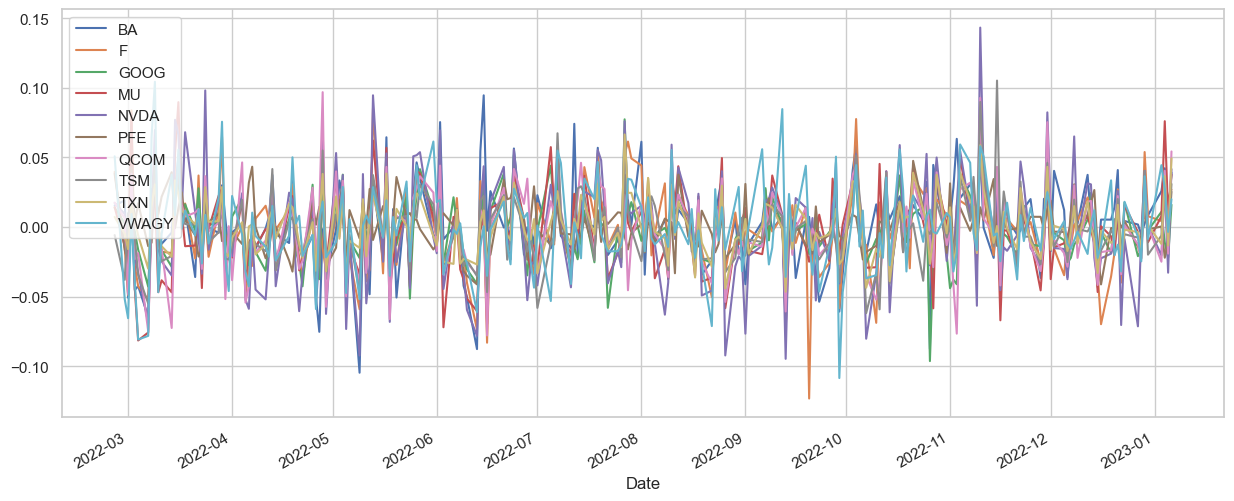

In [83]:
returns.plot(figsize = (15, 6));

In [84]:
# Годовые доходности
annual_returns = returns.mean() * portfolio.shape[0] # mean in period
annual_returns

BA       0.171447
F       -0.187209
GOOG    -0.344852
MU      -0.340515
NVDA    -0.298814
PFE      0.158535
QCOM    -0.261623
TSM     -0.274824
TXN      0.097312
VWAGY   -0.161028
dtype: float64

In [85]:
# Строим матрицу ковариаций
cov_matrix_a = returns.cov() * portfolio.shape[0]
cov_matrix_a

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
BA,0.200241,0.124351,0.092339,0.112412,0.169932,0.020172,0.099102,0.083021,0.073809,0.108837
F,0.124351,0.193259,0.094782,0.136153,0.173698,0.030672,0.119673,0.091579,0.084432,0.123890
GOOG,0.092339,0.094782,0.131178,0.111604,0.163434,0.028238,0.111714,0.088099,0.081098,0.087150
MU,0.112412,0.136153,0.111604,0.202921,0.205252,0.034143,0.153036,0.114562,0.105624,0.113872
NVDA,0.169932,0.173698,0.163434,0.205252,0.343947,0.048957,0.204626,0.162494,0.141732,0.145345
PFE,0.020172,0.030672,0.028238,0.034143,0.048957,0.062579,0.034341,0.021579,0.029311,0.027736
QCOM,0.099102,0.119673,0.111714,0.153036,0.204626,0.034341,0.189302,0.123685,0.103961,0.102337
TSM,0.083021,0.091579,0.088099,0.114562,0.162494,0.021579,0.123685,0.131551,0.081765,0.094303
TXN,0.073809,0.084432,0.081098,0.105624,0.141732,0.029311,0.103961,0.081765,0.087661,0.075146
VWAGY,0.108837,0.123890,0.087150,0.113872,0.145345,0.027736,0.102337,0.094303,0.075146,0.207294


In [86]:
# Логарифмируем для нормализации распределений и выравнпивания дисперсий
cov_matrix_LOG = np.log(portfolio / portfolio.shift(1)).cov() * portfolio.shape[0]
cov_matrix_LOG

,BA,F,GOOG,MU,NVDA,PFE,QCOM,TSM,TXN,VWAGY
BA,0.202098,0.125060,0.093550,0.113201,0.171457,0.020572,0.099505,0.083359,0.073962,0.110520
F,0.125060,0.195465,0.094697,0.136612,0.174124,0.031190,0.120759,0.091254,0.084108,0.124875
GOOG,0.093550,0.094697,0.131612,0.111478,0.162500,0.028285,0.111391,0.087275,0.080655,0.086860
MU,0.113201,0.136612,0.111478,0.203434,0.204865,0.034079,0.153293,0.114132,0.105350,0.114784
NVDA,0.171457,0.174124,0.162500,0.204865,0.343326,0.049263,0.203988,0.161425,0.141005,0.145781
PFE,0.020572,0.031190,0.028285,0.034079,0.049263,0.062265,0.034379,0.021693,0.029281,0.027909
QCOM,0.099505,0.120759,0.111391,0.153293,0.203988,0.034379,0.189809,0.122748,0.103660,0.102958
TSM,0.083359,0.091254,0.087275,0.114132,0.161425,0.021693,0.122748,0.130058,0.081329,0.094379
TXN,0.073962,0.084108,0.080655,0.105350,0.141005,0.029281,0.103660,0.081329,0.087154,0.075103
VWAGY,0.110520,0.124875,0.086860,0.114784,0.145781,0.027909,0.102958,0.094379,0.075103,0.207510


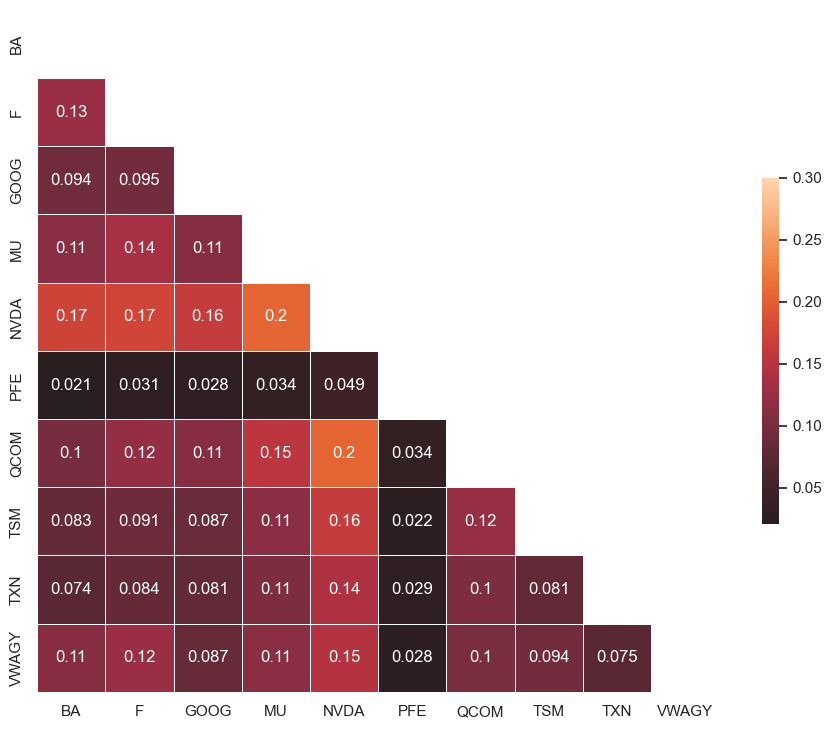

In [87]:
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_matrix_LOG, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,);

<span style="color:blue"> Обратите внимание, как доходности акций из разных отраслей ковариирую между собой и как меняется ковариация в разные исторические периоды </span>


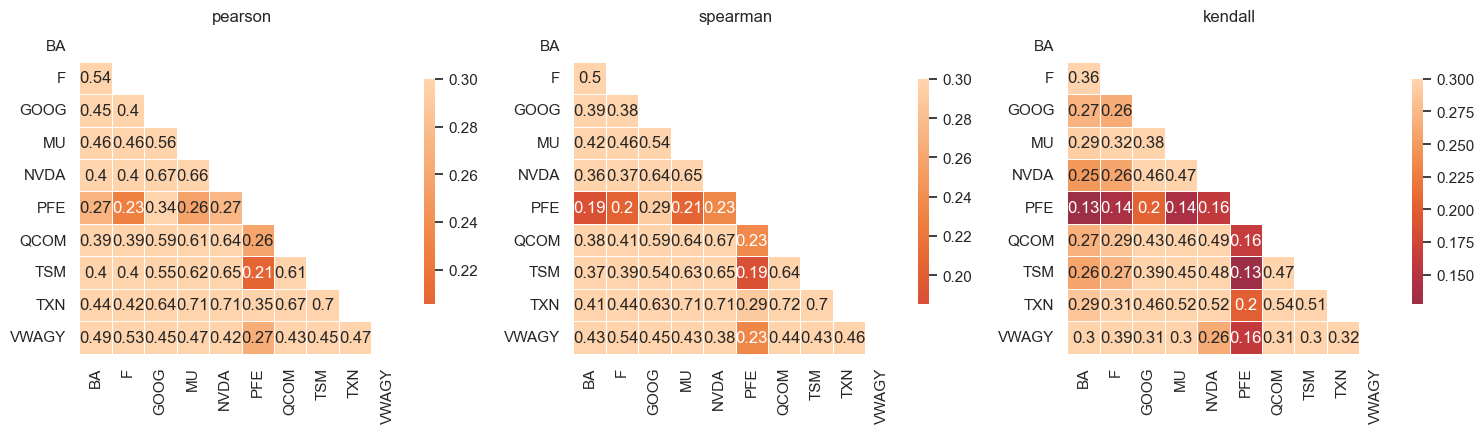

In [46]:
# А что показывает корреляция? 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.set(style="whitegrid")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_matrix_LOG, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

for corr_type, ax in zip(('pearson', "spearman", 'kendall'),(ax1, ax2, ax3)):

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(returns.corr(method=corr_type), mask=mask,  vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax)
    ax.set_title(corr_type)

plt.tight_layout()
plt.show();

In [47]:
# Корреляции с помощью numpy
## For Dimensionality Reduction
correlations = np.abs([np.corrcoef(returns["GOOG"],returns[col_name])[0,1] for col_name in tickers[1:]])
print (list(zip(tickers[1:],correlations)))

[('PFE', 0.3399876731591303), ('BA', 0.4451000536771021), ('F', 0.40179943412486224), ('VWAGY', 0.4482013788145003), ('MU', 0.5578926985790488), ('TSM', 0.5534672252357546), ('TXN', 0.6444274417296149), ('QCOM', 0.5856929909084053), ('NVDA', 0.6667000247827986)]


In [48]:
# Не сильно связаны!
correlations[correlations < .8]

array([0.33998767, 0.44510005, 0.40179943, 0.44820138, 0.5578927 ,
       0.55346723, 0.64442744, 0.58569299, 0.66670002])

In [49]:
# Выборка из 2х акций с разными типами корреляций
goog_ba = pd.DataFrame(columns = ('pearson', "spearman", 'kendall'))
for corr_type in goog_ba.columns:
       goog_ba[corr_type] = [returns['GOOG'].corr(other=returns["BA"], method=corr_type)] 
goog_ba

,pearson,spearman,kendall
0,0.4451,0.388686,0.27157


In [50]:
# простой способ
[returns['GOOG'].corr(other=returns["BA"])]

[0.4451000536771021]

In [51]:
# доверительный интервал
returns['GOOG'].sem() 

0.0005556598514335809

In [52]:
# средняя доходность
returns['GOOG'].mean() 

0.0005944470566942063

<AxesSubplot:>

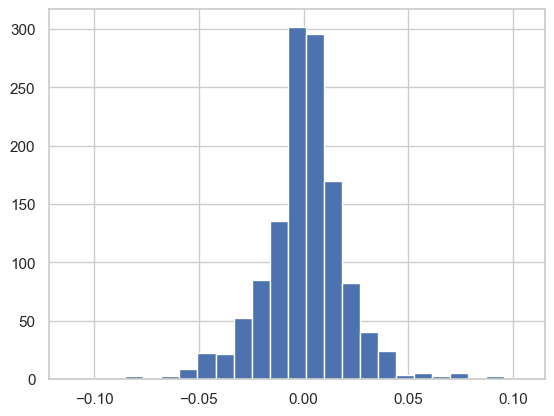

In [53]:
# доходность GOOG на графике
returns['GOOG'].hist(bins=25)